#### 机器学习 sklearn2——数据预处理

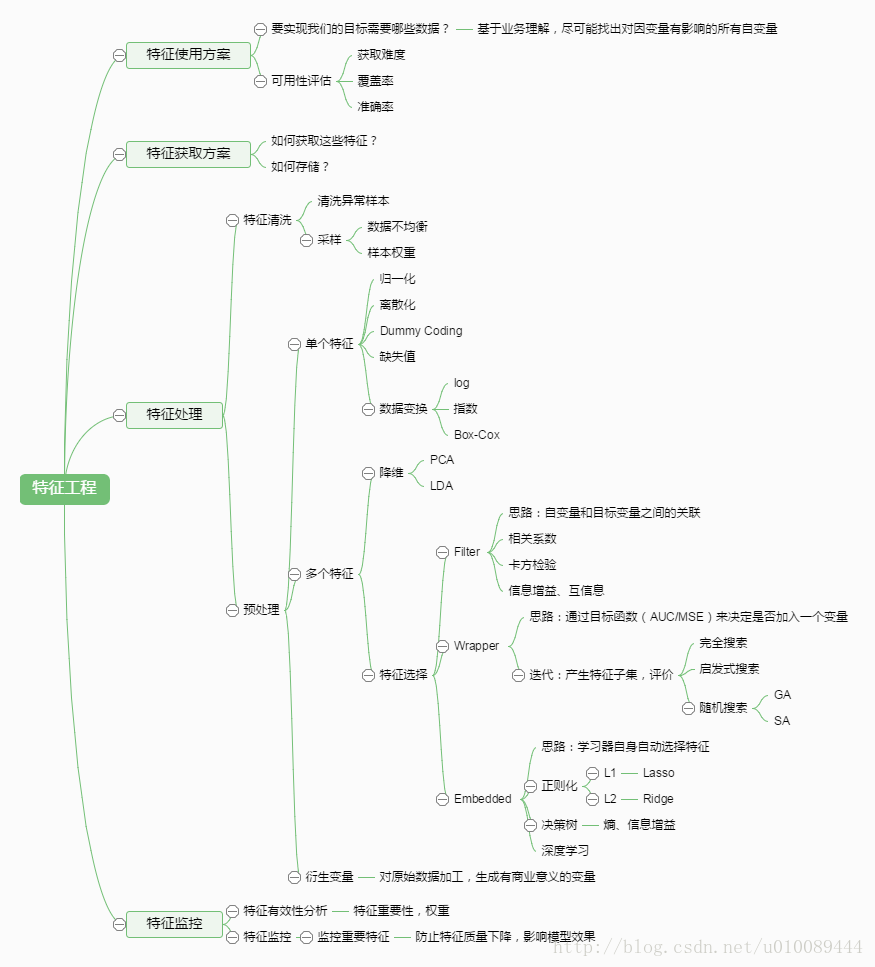

#### 数据预处理
数据预处理和特征选择是数据挖掘与机器学习中关注的重要问题，坊间常说：数据和特征决定了机器学习的上限，而模型和算法只是逼近这个上限而已。特征工程就是将原始数据转化为有用的特征，更好的表示预测模型处理的实际问题，提升对于未知数据的预测准确性。<br>
*当我们拿到一批原始的数据：*<br>
    1、首先要明确有多少特征，哪些是连续的，哪些是类别的。<br>
    2、检查有没有缺失值，对确实的特征选择恰当方式进行弥补，使数据完整。<br>
    3、对连续的数值型特征进行标准化，使得均值为0，方差为1。<br>
    4、对类别型的特征进行one-hot编码。<br>
    5、将需要转换成类别型数据的连续型数据进行二值化。<br>
    6、为防止过拟合或者其他原因，选择是否要将数据进行正则化。<br>
    7、在对数据进行初探之后发现效果不佳，可以尝试使用多项式方法，寻找非线性的关系。<br>
    8、根据实际问题分析是否需要对特征进行相应的函数转换。<br><br>
**数据预处理9种方法(使用sklearn-preprocessing)：**

### 1.1 标准化（Standardization or Mean Removal and Variance Scaling)——均值移除

Standardization标准化: 将特征数据的分布调整成标准正太分布，也叫高斯分布，也就是使得数据的均值为0，方差为1。标准化，也叫z-score规范化（零均值规范化）。<br>
标准化的原因：在于如果有些特征的方差过大，则会主导目标函数从而使参数估计器无法正确地去学习其他特征。<br>
标准化的过程为两步：去均值的中心化（均值变为0——均值移除）；方差的规模化（方差变为1）。<br>
实际应用中，需要做特征标准化的常见情景：SVM<br>
在sklearn.preprocessing中提供了一个scale的方法，可以实现以上功能。<br>
该方法将原始数据归一化成均值为0、方差1的数据，归一化公式如下：<br>
$$x_{norm}=\frac{x−μ}{σ}$$<br>
其中，μ和σ分别为原始数据的均值和方差。该种归一化方式要求原始数据的分布可以近似为高斯分布，否则归一化的效果会变得很糟糕。使用preproccessing库的StandardScaler类对数据进行标准化的代码如下：

In [7]:
# 1. 标准化：去均值——0，方差规模化——1
from sklearn import preprocessing
import numpy as np

x = np.array([[1., -1., 2.],
              [2., 0., 0.],
              [0., 1., -1.]])
# 将每一列特征标准化为标准正太分布，注意，标准化是针对每一列而言的
x_scale = preprocessing.scale(x)
print(type(x_scale), x_scale.shape)
print(x_scale)
# 可以查看标准化后的数据的均值与方差，已经变成0,1了
print(x_scale.mean(axis=0), x_scale.std(axis=0))    # axis=0 表示对每一列
print(x_scale.mean(axis=1), x_scale.std(axis=1))    # axis=1 表示对每一行，未标准化

<class 'numpy.ndarray'> (3, 3)
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
[0. 0. 0.] [1. 1. 1.]
[ 0.03718711  0.31916121 -0.35634832] [1.04587533 0.64957343 1.11980724]


preprocessing这个模块还提供了一个实用类StandarScaler，它可以在训练数据集上做了标准转换操作之后，把相同的转换应用到测试训练集中。<br>
这是相当好的一个功能。可以对训练数据，测试数据应用相同的转换，以后有新的数据进来也可以直接调用，不用再重新把数据放在一起再计算一次了。

In [10]:
# 调用fit方法，根据已有的训练数据创建一个标准化的转换器
# 另外，StandardScaler()中可以传入三个参数：copy,with_mean,with_std.这两个都是布尔型的参数,
# 默认情况下都是true,但也可以自定义成false.即不要均值中心化或者不要方差规模化为1.copy表示转化后的数据要不要覆盖原数据。
scaler = preprocessing.StandardScaler().fit(x)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
# 使用上面这个转换器去转换训练数据x,调用transform方法
new_x = [[-1., 1., 0.]]
x_scale2 = scaler.transform(new_x)
print(x_scale2)
print(x_scale.mean(axis=0), x_scale.std(axis=0))

[[-2.44948974  1.22474487 -0.26726124]]
[0. 0. 0.] [1. 1. 1.]


##### 本处用于与正则化对比理解<br>
上述方法是对每个特征（特征矩阵中的列）进行归一化，除此之外，我们还可以对每个样本（特征矩阵中的行）进行归一化，将样本所对应的特征向量转化为单位向量，其目的在于样本向量在点乘运算或其他核函数计算相似性时，拥有统一的标准。使用preproccessing库的Normalizer类对数据进行归一化的代码如下：

In [45]:
from sklearn.preprocessing import Normalizer

#归一化，返回值为行归一化后的数据
x_norm = Normalizer().fit_transform(x_)
print(x_norm.shape)            

(150, 4) 0.2410084769256249


### 1.2 区间缩放（Min-Max scaling）

区间缩放法将原始数据中特征的取值区间转换到[0 1]范围，归一化公式如下：<br>
                                    $$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$ <br>
该方法实现对原始数据的等比例缩放，其中x为原始数据，$x_{norm}$为归一化后的数据，$x_{max}$和$x_{min}$分别为原始数据的最大值和最小值。

In [40]:
# MinMaxScaler : 对数据进行区间缩放,其中是给定了一个明确的最大值与最小值。它的计算公式如下：
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std / (max - min) + min
# 以下这个例子是将数据规与[0,1]之间，每个特征中的最小值变成了0，最大值变成了1，请看：
from sklearn.datasets import load_iris

x_ = load_iris().data
min_max_scaler = preprocessing.MinMaxScaler()
x_minmax = min_max_scaler.fit_transform(x)
print(x_minmax)

# 同样的，如果有新的测试数据进来，也想做同样的转换咋办呢？请看：
x_test = np.array([[-3., -1., 4.]])
x_test_minmax = min_max_scaler.transform(x_test)
print('\n',x_test_minmax)

[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]

 [[-1.5         0.          1.66666667]]


##### 1.3 规模化稀疏数据

如果对稀疏数据进行去均值的中心化就会破坏稀疏的数据结构。虽然如此，我们也可以找到方法去对稀疏的输入数据进行转换，特别是那些特征之间的数据规模不一样的数据。<br>
MaxAbsScaler 和 maxabs_scale这两个方法是专门为稀疏数据的规模化所设计的。 MaxAbsScaler的原理与上面的MinMaxScaler很像，只是数据会被规模化到[-1,1]之间。也就是特征中，所有数据都会除以最大值。这个方法对那些已经中心化均值维0或者稀疏的数据有意义。

##### 1.4规模化有异常值的数据

如果你的数据有许多异常值，那么使用数据的均值与方差去做标准化就不行了。<br>
在这里，你可以使用robust_scale 和 RobustScaler这两个方法。它会根据中位数或者四分位数去中心化数据

##### 2.正则化Normalization

正则化是将样本在向量空间模型上的一个转换(是将不同变化范围的值映射到相同的固定范围，常见的是[0,1]，此时也称为归一化)，经常被使用在分类与聚类中。<br>
函数normalize 提供了一个快速有简单的方式在一个单向量上来实现这正则化的功能。正则化有l1,l2等，这些都可以用上：

In [37]:
# L2 norm，变换后每个样本的各维特征的平方和为1。类似地，L1 norm则是变换后每个样本的各维特征的绝对值和为1。
# 还有max norm，则是将每个样本的各维特征除以该样本各维特征的最大值。
x_normalized = preprocessing.normalize(x, norm='l2')
print(x_normalized)
print(x)

[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]
[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]


preprocessing这个模块还提供了一个实用类Normalizer,实用transform方法同样也可以对新的数据进行同样的转换

In [38]:
# 根据训练数据创建一个正则器
normalizer = preprocessing.Normalizer().fit(x)   # Normalizer()  默认norm参数为：l1
print(normalizer)
# 对新的测试数据进行正则
nor_scale = normalizer.transform([[-1., 1., 0.]])
print(nor_scale)
# normalize和Normalizer都既可以用在密集数组也可以用在稀疏矩阵（scipy.sparse)中
# 对于稀疏的输入数据，它会被转变成维亚索的稀疏行表征（具体请见scipy.sparse.csr_matrix)

Normalizer(copy=True, norm='l2')
[[-0.70710678  0.70710678  0.        ]]


### 1.3 二值化——特征的二值化

特征二值化的方法是将特征的取值转化为0或1。例如，在房价预测问题中对于“是否为学区房”这一特征，取值为1表示该房是学区房，反之则为0。在sklearn中可以设置一个阈值，大于阈值的赋值为1，小于等于阈值的赋值为0(默认阈值为0)。使用preproccessing库的Binarizer类对数据进行二值化的代码如下：

In [1]:
binarizer = preprocessing.Binarizer().fit(x)
bin_scale1 = binarizer.transform(x)
print(bin_scale1)
#当然也可以自己设置这个阀值，只需传出参数threshold即可
binarizer2 = preprocessing.Binarizer(threshold=1.5)
bin_scale2 = binarizer2.transform(x)
print(bin_scale2)

NameError: name 'preprocessing' is not defined

#### 独热编码(OneHotEncoder)与标签编码(LabelEncoder)

参考1：[数据挖掘OneHotEncoder独热编码和LabelEncoder标签编码](#https://blog.csdn.net/ccblogger/article/details/80010974)

### 1.4 缺失值计算<br>
在实际应用中，我们得到的数据往往不完整，可以用以下方法进行处理：<br>
1、最简单直接的方法是删除含有缺失值的数据删，这种做法的缺点是可能会导致信息丢失<br>
2、通过已有数据计算相应特征的平均数、中位数、众数等来补全缺失值<br>
3、建立一个模型来“预测”缺失的数据。（KNN, Matrix completion等方法）<br>
4、引入虚拟变量(dummy variable)来表征是否有缺失，是否有补全<br>
用preproccessing库的Imputer类对数据进行缺失值计算的代码如下：<br>

In [2]:
from numpy import vstack, array, nan
from sklearn.preprocessing import Imputer

#缺失值计算，返回值为计算缺失值后的数据
#参数missing_value为缺失值的表示形式，默认为NaN
#对数据集新增一个样本，4个特征均赋值为NaN，表示数据缺失
#参数strategy为缺失值填充方式，默认为mean（均值）
Imputer().fit_transform(vstack((array([nan, nan, nan, nan]), iris.data)))

NameError: name 'iris' is not defined

### 1.5 数据变换<br>
常见的数据变换有基于多项式的、基于指数函数的、基于对数函数的。<br>
使用preproccessing库的PolynomialFeatures类对数据进行多项式转换的代码如下：<br>
from sklearn.preprocessing import PolynomialFeatures<br>
#多项式转换
#参数degree为度，默认值为2
PolynomialFeatures().fit_transform(iris.data)

基于单变元函数的数据变换可以使用一个统一的方式完成，使用preproccessing库的FunctionTransformer对数据进行对数函数转换的代码如下：

from numpy import log1p
from sklearn.preprocessing import FunctionTransformer

#自定义转换函数为对数函数的数据变换
#第一个参数是单变元函数
FunctionTransformer(log1p).fit_transform(iris.data)


# 1.6 样本不均衡<br>
样本不均衡指的是数据集中的正样本数量与负样本数量的比例失衡。例如，实际应用中，负样本的数量通常远远大于正样本。样本不均衡的危害：造成分类器在多数类精度较高，少数类的分类精度很低，甚至造成分类器失效。解决方案分为以下两种：<br>
欠采样：通过减少多数类样本来提高少数类的分类性能 <br>
　　　　1、随机地去掉一些多数类样本来减小多数类的规模，该方法的缺点是会丢失多数类的一些重要信息，不能够充分利用已有的信息<br>
　　　　2、通过一定规则有选择的去掉对分类作用不大的多数样本（保留与正样本较为接近的负样本）<br>
过抽样：通过改变训练数据的分布来消除或减小数据的不平衡 <br>
　　　　对少数类样本进行复制，该方法的缺点是可能导致过拟合，因为没有给少数类增加任何新的信息<br>
算法层面：<br>
　　　　1、改进损失函数的权重，加大少数样本的权值<br>
　　　　2、采用集成学习（bagging, boosting）<br>